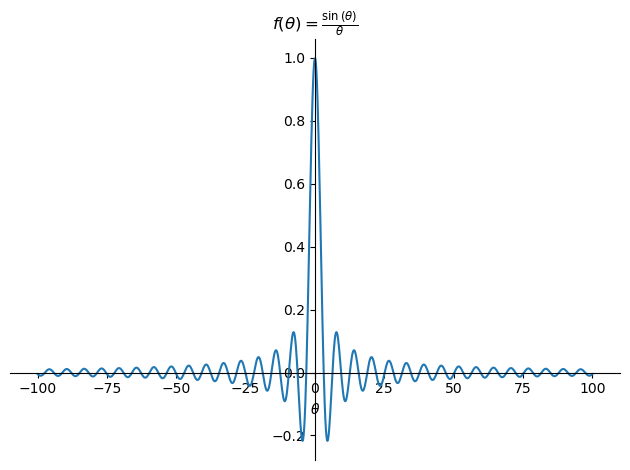

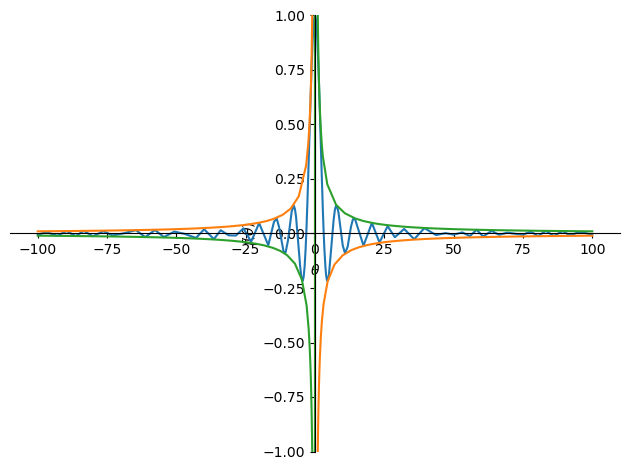

<lambdifygenerated-16>:2: RuntimeWarning: divide by zero encountered in divide
  return -1/theta
<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in divide
  return sin(theta)/theta
<lambdifygenerated-18>:2: RuntimeWarning: divide by zero encountered in reciprocal
  return theta**(-1.0)


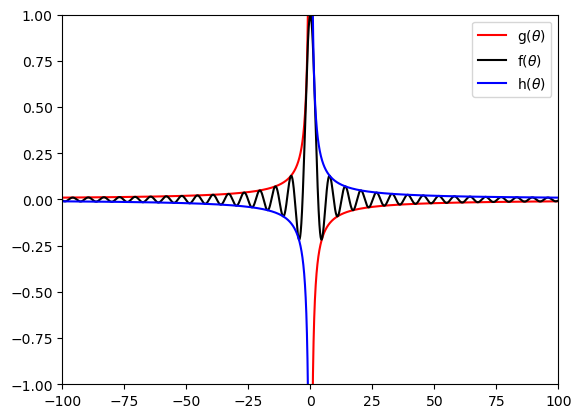

In [ ]:
##### LIMITS OF TRIG FUNCTIONS ###########

import numpy as np   
import sympy as sym 
import matplotlib.pyplot as plt

###### USING THE SQUEEZE METHOD  #################

theta = sym.symbols('theta')

fx = sym.sin(theta) / theta

x1lim = -100
x2lim = 100
# plot the function 
sym.plot(
    fx, (theta,x1lim, x2lim), # expand x-axis range specifying the x variable theta
    nb_of_points=1000, # pass in number of points to make the line smoother and adaptive=False tells sympy to ignore its number of points and use the one we've provided
    adaptive=False,
    ylabel=None,
    title=f'$f(\\theta) = %s$'%sym.latex(fx)) 

# Squeeze methods
gx = -1/theta
hx = 1/theta

# plot the functions squeezing the original
sym.plot(fx,gx,hx,(theta,x1lim,x2lim),ylim=[-1,1]) # restrict y axis to bounds of -1 and 1

# lambdify the functions to work with matplotlib easier
gFun = sym.lambdify(theta,gx)
fFun = sym.lambdify(theta,fx)
hFun = sym.lambdify(theta,hx)
# get x input range
# xx = np.linspace(-100,100,10000) # use even number of points to not have an exact 0 in the numbers to avoid the warnings of dividing by 0 in the function
xx = np.linspace(-100,100,10001) # for the purpose of this plot we do not want the plot altered with above, so accept the warnings and keep number as odd

plt.plot(xx,gFun(xx),'r',label='g($\\theta$)')
plt.plot(xx,fFun(xx),'k',label='f($\\theta$)')
plt.plot(xx,hFun(xx),'b',label='h($\\theta$)')

plt.ylim([-1,1])
plt.xlim(xx[[0,-1]]) # limit x range to the first and last element in xx with ([[0,-1]])
plt.legend()
plt.show()


<lambdifygenerated-16>:2: RuntimeWarning: divide by zero encountered in divide
  return -1/theta
<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in divide
  return sin(theta)/theta
<lambdifygenerated-18>:2: RuntimeWarning: divide by zero encountered in reciprocal
  return theta**(-1.0)


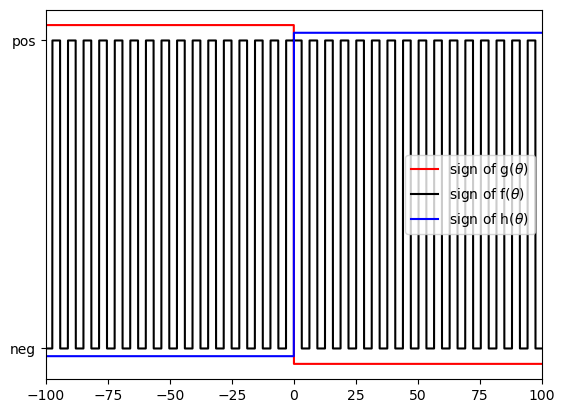

Limit of g as theta->Infinity: 0

Limit of f as theta->Infinity: 0

Limit of h as theta->Infinity: 0


In [24]:
# Extract and plot the signs (negative or positive) of our functions

# multiply the outputs of the red and blue lines a bit to offset so they are easy to see on the plot
plt.plot(xx,np.sign(gFun(xx))*1.1,'r',label='sign of g($\\theta$)')
plt.plot(xx,np.sign(fFun(xx)),'k',label='sign of f($\\theta$)')
plt.plot(xx,np.sign(hFun(xx))*1.05,'b',label='sign of h($\\theta$)')

plt.ylim([-1.2,1.2]) # expand the y range to show the top and bottom lines
# we need to adjust the y axis since numbers are meaningless for plotting signs (either negative or positive binary)
plt.yticks([-1,1],['neg','pos']) # second arg is label to replace what is shown on y ticks
plt.xlim(xx[[0,-1]]) # limit x range to the first and last element in xx with ([[0,-1]])
plt.legend()
plt.show()

# This shows that the sign of the original function oscillates postive and negative as theta goes to infinity
# the squeeze theorem proves though that the function settles to 0 in the limit as theta goes to infinity

print(f'Limit of g as theta->Infinity: {sym.limit(gx,theta,sym.oo,dir="-")}') # use '-' for dir since we approach infinity from the left, not the right
print(f'\nLimit of f as theta->Infinity: {sym.limit(fx,theta,sym.oo,dir="-")}')
print(f'\nLimit of h as theta->Infinity: {sym.limit(hx,theta,sym.oo,dir="-")}')

<lambdifygenerated-40>:2: RuntimeWarning: invalid value encountered in divide
  return tan(theta)/theta
<lambdifygenerated-41>:2: RuntimeWarning: invalid value encountered in divide
  return sin(theta)/theta


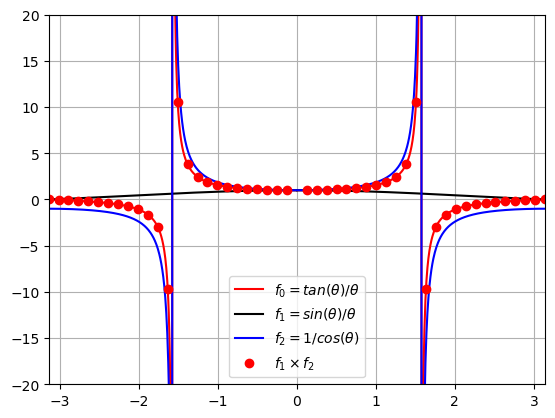

Value of f0 at theta=0: nan
Value of f1 at theta=0: nan
Value of f2 at theta=0: 1


In [ ]:
##### LIMIT of tan(theta) / theta as theta goes to 0 #########

# https://www.udemy.com/course/pycalc1_x/learn/lecture/33947328

theta = sym.symbols('theta')

f0 = sym.tan(theta) / theta 
# functions to help solve the limit of f0 above
  # to get these we split tan function as the ratio and swap the denominators - see notes
f1 = sym.sin(theta) / theta
f2 = 1 / sym.cos(theta)

# Lambdify the functions to plot with matplotlib

f0Fun = sym.lambdify(theta, f0)
f1Fun = sym.lambdify(theta, f1)
f2Fun = sym.lambdify(theta, f2)

xx = np.linspace(-np.pi,np.pi,1001) # range of x input

plt.plot(xx, f0Fun(xx),'r',label=r'$f_0=tan(\theta)/\theta$')
plt.plot(xx, f1Fun(xx),'k',label=r'$f_1=sin(\theta)/\theta$')
plt.plot(xx, f2Fun(xx),'b',label=r'$f_2=1/cos(\theta)$')

# show red dots over the original function proving that multiplying f1 and f2 is the same
# [::20] skips the entries in steps of 20 to make them easier to see over the original line of f1
plt.plot(xx[::20],f1Fun(xx[::20])*f2Fun(xx[::20]), 'ro', label=r'$f_1 \times f_2$')

plt.ylim([-20,20])
plt.xlim(xx[[1,-1]])
plt.legend()
plt.grid()
plt.show()

# The value of the original function when theta is 0 is a discontinuity:
print(f'Value of f0 at theta=0: {f0.subs(theta,0)}')
print(f'Value of f1 at theta=0: {f1.subs(theta,0)}') # there is ALSO a discontinuity at theta=0 for f2!
print(f'Value of f2 at theta=0: {f2.subs(theta,0)}')

In [34]:
# Show that all of the functions limits do exist and that they are 1

print(f'Limit of f0 as theta->0: {sym.limit(f0,theta,0,dir="-")}') # use '+-' to come from both sides of the limit
print(f'\nLimit of f1 as theta->0: {sym.limit(f1,theta,0,dir="-")}')
print(f'\nLimit of f2 as theta->0: {sym.limit(f2,theta,0,dir="-")}')

Limit of f0 as theta->0: 1

Limit of f1 as theta->0: 1

Limit of f2 as theta->0: 1


The Function:


theta**2*exp(-theta**2)*log(theta**2)*sin(theta)

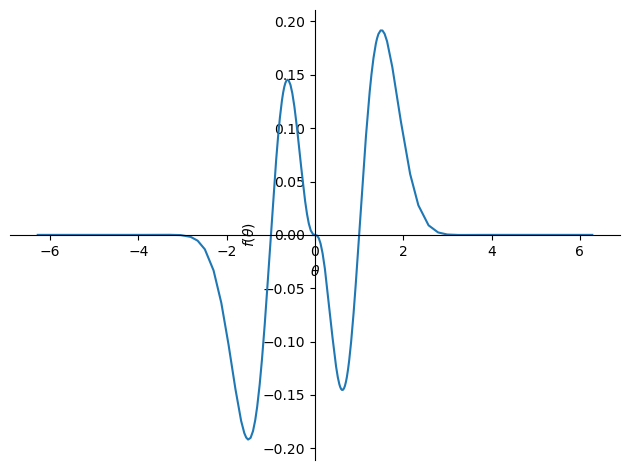

In [45]:
########## CAVEAT OF THE MULTIPLICATIVE PROPERTY OF LIMITS ONLY APPLIES IF ALL LIMITS EXIST ###########

# https://www.udemy.com/course/pycalc1_x/learn/lecture/33947328

# when theta is 0, ln(0) log of 0 is -infinity, so there is a discontinuity

# The domain of this function is all real numbers except 0

# The product of all the limits is NAN - not 0, so the caveat of multiplicative property on limits shows

# Get the parts of the function
parts = [ theta**2, sym.exp(-theta**2), sym.log(theta**2), sym.sin(theta) ]

# Our full function with all parts combined:
expr = 1
for p in parts:
    expr *= p

print('The Function:')
display(expr)

domain = (theta, -2*sym.pi,2*sym.pi)
sym.plot(expr, domain)

In [53]:
# What is the value of the function when theta = 0
print('f(theta) when Theta = 0:')
display(expr.subs(theta,0))
print('The Limit of f(theta) as theta approaches 0 is:')
print(sym.limit(expr,theta,0,dir='+-'))
# Note how the function has a discontinuity at theta=0 yet the limit is still 0 and exists

# Get the Domain of the function with Sympy:
print('\nThe domain of f(theta) is all real numbers from -inf to +inf except for 0:')
display(sym.calculus.util.continuous_domain(expr, theta, sym.Reals))
# this shows the Union of -inf to 0 (exclusive) and from 0 (exclusive) to +infinity

f(theta) when Theta = 0:


nan

The Limit of f(theta) as theta approaches 0 is:
0

The domain of f(theta) is all real numbers from -inf to +inf except for 0:


Union(Interval.open(-oo, 0), Interval.open(0, oo))

In [60]:
## Get the Limit of each part of the function and then compute the product of those
# Show that the multiplicative property does NOT hold since not all limits are defined
c=1
for p in parts:
    print(f"Limit of {p} as theta->0 is {sym.limit(p,theta,0,dir='+-')}")
    c *= sym.limit(p,theta,0,dir='+-')
# Note how the third part is -oo, minus infinity and so the limit is not defined

print('\nProduct of all the limits (multiplicative property does not hold):')
print(c)



Limit of theta**2 as theta->0 is 0
Limit of exp(-theta**2) as theta->0 is 1
Limit of log(theta**2) as theta->0 is -oo
Limit of sin(theta) as theta->0 is 0

Product of all the limits (multiplicative property does not hold):
nan
